### Load data

In [1]:
import pandas as pd
import numpy as np
import joblib
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from lightgbm.sklearn import LGBMClassifier

In [2]:
# Load dataset 
df = joblib.load('castelli_perovskites_merged_v2.pkl')

# Define features and target variable
features = joblib.load('features_band_type_.pkl')
print('No. of features', len(features))

df.head()

No. of features 3980


,minimum_oxidation_state,maximum_oxidation_state,range_oxidation_state,std_dev_oxidation_state,compound_possible,max_ionic_char,avg_ionic_char,avg_anion_electron_affinity,minimum_EN_difference,maximum_EN_difference,...,crystal_system_ohe_orthorhombic,crystal_system_ohe_tetragonal,fermi_level,fermi_width,e_form,gap_is_direct,mu_b,vbm,cbm,gap_gllbsc
0,-3,6,9,5.070926,1,0.198203,0.040242,-21000.000000,0.760000,0.940000,...,0,0,0.312138,0.001837,2.16,True,1.974478e-02,6.187694,6.187694,0.0
1,0,0,0,0.000000,1,0.681744,0.131124,0.000000,0.000000,0.000000,...,0,1,0.297083,0.001837,1.52,True,-2.253054e-05,6.033125,6.033125,0.0
2,-2,7,9,4.149967,1,0.660947,0.117035,-262000.000000,1.360000,1.360000,...,1,0,0.191139,0.003675,1.48,True,4.982109e+00,6.602253,6.602253,0.0
3,-2,3,5,2.886751,1,0.447278,0.076431,-321333.333333,0.793333,1.253333,...,1,0,0.316346,0.001837,1.24,True,-8.684496e-01,5.738462,5.738462,0.0
4,-2,4,6,2.687419,1,0.833972,0.154752,-297333.333333,1.600000,2.320000,...,1,0,0.312658,0.003675,0.62,True,2.164069e-15,6.074736,6.074736,0.0


In [3]:
target = 'gap_is_direct'
print(target)

gap_is_direct


### Split & Scale Features

In [4]:
!cd

c:\Users\songy\OneDrive\Documents\GBSFS4MPP_local\new_properties\1. castelli_perovskites (done)


In [5]:
# Split dataset
df_train, df_test = train_test_split(
                                    df, 
                                    test_size=0.2, 
                                    stratify=df[target].tolist(), 
                                    random_state=42
                                    ) 

In [6]:
# Save unscaled data
joblib.dump(df_train, 'df_train_' + str(target) + '.pkl')
joblib.dump(df_test, 'df_test_' + str(target) + '.pkl')

['df_test_gap_is_direct.pkl']

In [7]:
# Scale the features
scaling = MinMaxScaler(feature_range=(0, 1))

df_train[features] = pd.DataFrame(
                                    scaling.fit_transform(df_train[features].values),
                                    columns=df_train[features].columns,
                                    index=df_train[features].index
                                )
                                

# Create pandas.Dataframe of scaled test set using scaler as defined using training set                           
df_test[features] = pd.DataFrame(
                                    scaling.transform(df_test[features].values),
                                    columns=df_test[features].columns,
                                    index=df_test[features].index
                                )

c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [8]:
# Save 
os.chdir('C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/1. castelli_perovskites (done)')

joblib.dump(df_train, 'df_train_' + str(target) + '_scaled.pkl')
joblib.dump(df_test, 'df_test_' + str(target) + '_scaled.pkl')

['df_test_gap_is_direct_scaled.pkl']

#### GBFS

In [9]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import GBFS as gb

import joblib
import pandas as pd

In [10]:
# Target
target = 'gap_is_direct'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/1. castelli_perovskites (done)/'
path_to_file = path + 'df_train_' + str(target) + '_scaled.pkl'
path_to_save = path + 'direct_indirect_results/'

# Either a list or saved file
features = path + 'features_band_type_.pkl'

problem = 'classification'

In [11]:
# Initialization 
FS = gb.GBFS(
            path_to_file = path_to_file, 
            path_to_save = path_to_save, 
            target = target,
            features = features,
            oversampled_it = True, 
            problem = problem,
            target_classes=2
            )

Name of target column:  gap_is_direct
No. of exploratory features:  3980


In [12]:
# Conduct grid search to perform preliminary scan of the hyperparameter space & retrieve a trained model
FS.run(
        boosting_method = 'lightGBM', 
        objective='binary', 
        oversample_technique='smoothed_ros',
        cv_folds = 1
        )

Model employed:  lightGBM
Total no. of permutations: 8


   (1 of 8)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.1), ('num_leaves', 20)]
   No. of rows in the training set: 12113

   Oversampling training data...
   No. of rows in training set after oversampling: 23462
   Metric score:  0.50085
   [*** Current optimal Hyperparameters ***]
Finished loading model, total used 100 iterations


   (2 of 8)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.1), ('num_leaves', 30)]
   No. of rows in the training set: 12113

   Oversampling training data...
   No. of rows in training set after oversampling: 23462
   Metric score:  0.50000


   (3 of 8)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.2), ('num_leaves', 20)]
   No. of rows in the training set: 12113

   Oversampling training data...
   No. of rows in training set after oversampling: 23462
   Metric score:  0.55556
   [*** Current optimal Hyperparameters ***]
Finished loading model, total used 100 iterations

LGBMClassifier(importance_type='gain', n_estimators=200, num_leaves=20,
               objective='binary')

Result saved as: feature_relevance_score_gap_is_direct.pkl
Figure saved as: feature_relevance_plot_gap_is_direct.png


,feature,relevance_score
0,gap_AO,121960.702486
1,mu_b,19959.937230
2,LUMO_element_ohe_O,4423.331896
3,OFM_d2__s2,2674.022345
4,e_form,1976.729911
...,...,...
3975,OFM_f1__s1,0.000000
3976,OFM_f1__s2,0.000000
3977,OFM_f1__p1,0.000000
3978,OFM_f1__p2,0.000000


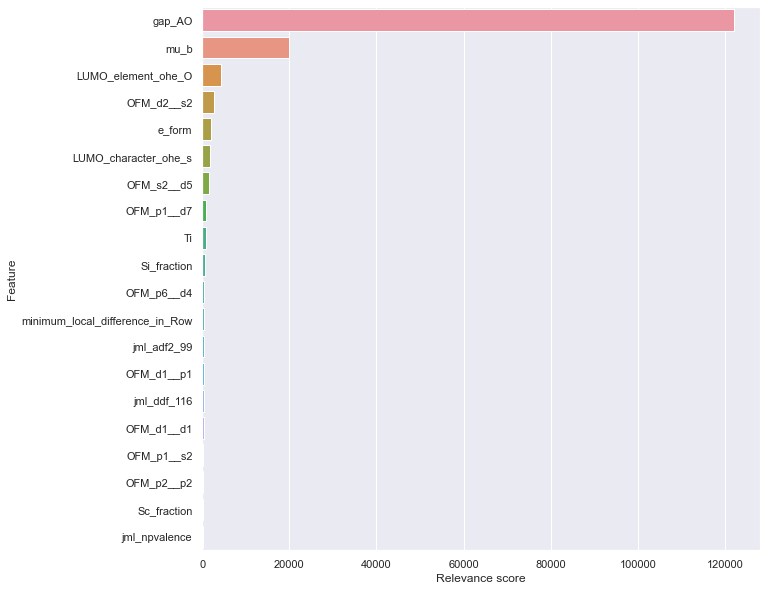

In [13]:
# Obtain feature relevance score
FS.feature_relevance(
                    plot = True, 
                    no_of_features = 20
                    )

In [14]:
# Perform recursive feature selection 
FS.recursive_selection(
                    stratify = True, 
                    oversample_technique = 'smoothed_ros', 
                    chosen_metric = 'f1_score',
                    average = 'weighted',
                    no_to_terminate = 200,
                    max_no_imp = 10
                    )

   No. of rows in training set:  12113
No. of features considering:  1

n=1: train_acc=0.9707, validation_acc=0.9663 

n=1: train_b_acc=0.5721, validation_b_acc=0.5342 

n=1: train_hl=0.0293 validation_hl=0.0337 

n=1: train_f1=0.9616, validation_f1=0.9555 

n=1: train_roc_auc=0.7630, validation_roc_auc=0.7322 

n=1: train_avg_precision)=0.9850, validation_avg_precision)=0.9837 

--- 0.19017243385314941 seconds --- 

No. of features considering:  2

n=2: train_acc=0.9806, validation_acc=0.9683 

n=2: train_b_acc=0.7215, validation_b_acc=0.5000 

n=2: train_hl=0.0194 validation_hl=0.0317 

n=2: train_f1=0.9775, validation_f1=0.9527 

n=2: train_roc_auc=0.9674, validation_roc_auc=0.5364 

n=2: train_avg_precision)=0.9987, validation_avg_precision)=0.9729 

--- 0.16715121269226074 seconds --- 

No. of features considering:  3

n=3: train_acc=0.9811, validation_acc=0.9683 

n=3: train_b_acc=0.7294, validation_b_acc=0.5000 

n=3: train_hl=0.0189 validation_hl=0.0317 

n=3: train_f1=0.9782, 

,train_acc,validation_acc,train_b_acc,validation_b_acc,train_hamming,validation_hamming,train_avg_precision,validation_avg_precision,train_roc_auc,validation_roc_auc,train_f1,validation_f1
no_of_features,,,,,,,,,,,,
1,0.970693,0.966326,0.572062,0.534242,0.029307,0.033674,0.985000,0.983749,0.763008,0.732171,0.961556,0.955510
2,0.980599,0.968306,0.721533,0.500000,0.019401,0.031694,0.998690,0.972896,0.967360,0.536362,0.977488,0.952715
3,0.981095,0.968306,0.729386,0.500000,0.018905,0.031694,0.998969,0.967689,0.972963,0.511075,0.978191,0.952715
4,0.983324,0.968306,0.750797,0.500000,0.016676,0.031694,0.999105,0.974930,0.976692,0.589747,0.980854,0.952715
5,0.990176,0.968306,0.849306,0.500000,0.009824,0.031694,0.999864,0.990899,0.995910,0.814389,0.989364,0.952715
6,0.990424,0.968306,0.851966,0.500000,0.009576,0.031694,0.999864,0.992648,0.995929,0.830810,0.989640,0.952715
7,0.990919,0.968637,0.863619,0.505208,0.009081,0.031363,0.999881,0.992632,0.996440,0.845528,0.990270,0.953528
8,0.990754,0.968306,0.861001,0.500000,0.009246,0.031694,0.999884,0.992990,0.996509,0.842791,0.990077,0.952715
9,0.990341,0.968306,0.853190,0.500000,0.009659,0.031694,0.999884,0.993571,0.996502,0.854733,0.989576,0.952715


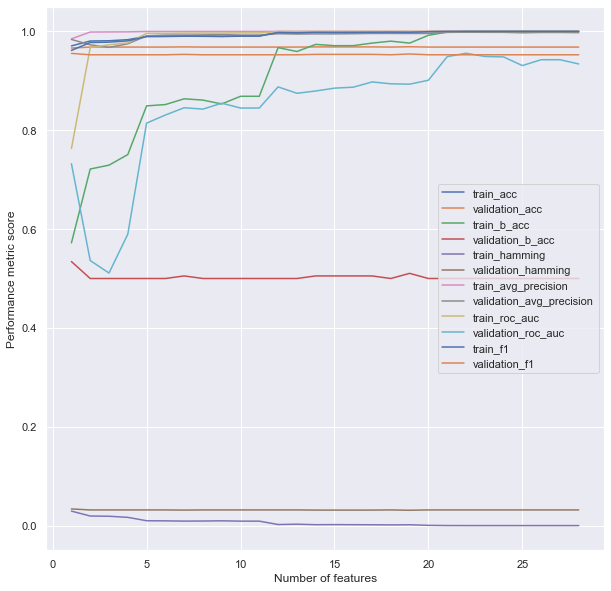

Result saved as: GBFS_convergence_plot_gap_is_direct.png


<Figure size 720x720 with 0 Axes>

In [15]:
# Plot the result
FS.convergence_plot()

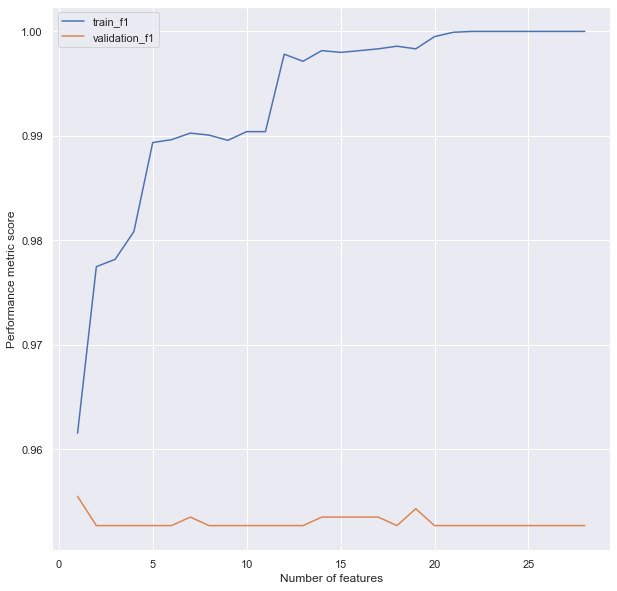

Result saved as: GBFS_convergence_plot_gap_is_direct.png


<Figure size 720x720 with 0 Axes>

In [16]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_f1',
                    validation_metric = 'validation_f1'
                    )

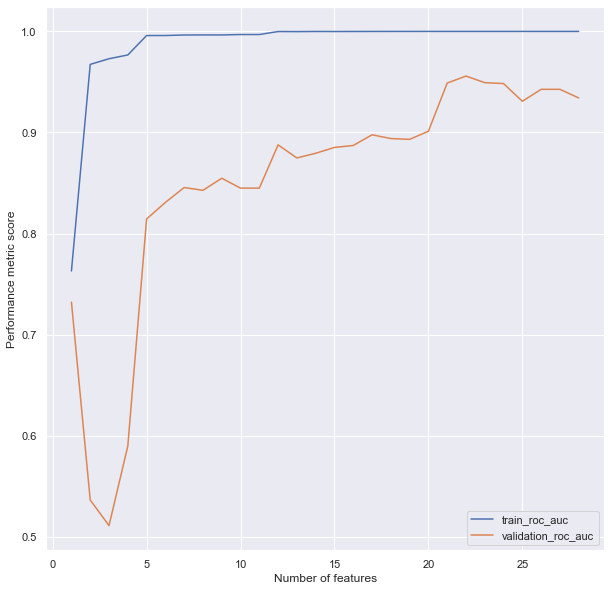

Result saved as: GBFS_convergence_plot_gap_is_direct.png


<Figure size 720x720 with 0 Axes>

In [17]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_roc_auc',
                    validation_metric = 'validation_roc_auc'
                    )

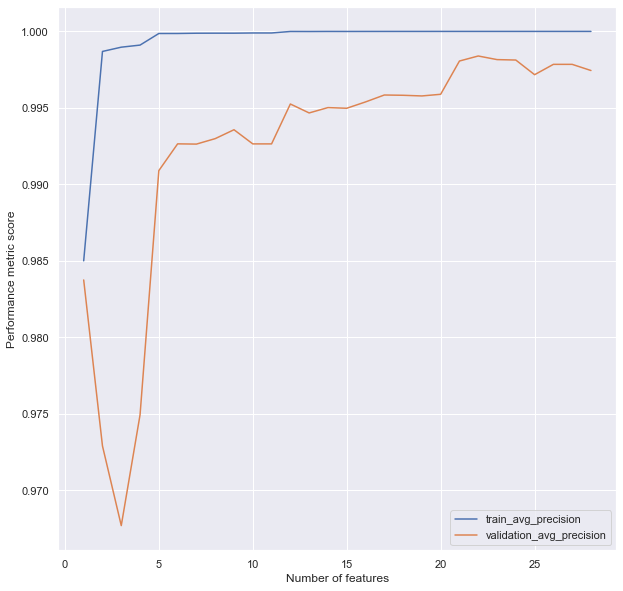

Result saved as: GBFS_convergence_plot_gap_is_direct.png


<Figure size 720x720 with 0 Axes>

In [18]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_avg_precision',
                    validation_metric = 'validation_avg_precision'
                    )

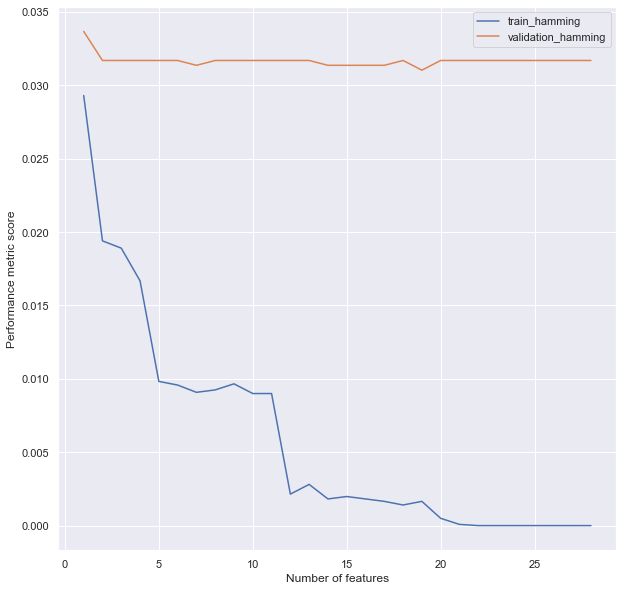

Result saved as: GBFS_convergence_plot_gap_is_direct.png


<Figure size 720x720 with 0 Axes>

In [19]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_hamming',
                    validation_metric = 'validation_hamming'
                    )

In [12]:
# # Plot the result
# FS.convergence_plot(
#                     train_metric = ['train_r_sq', 'train_rmse', 'train_mae'],
#                     validation_metric = ['va_r_sq', 'va_rmse', 'va_mae']
#                     )

##### Statistical Analyses - Classification

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import feature_analyses as fa

import joblib
import pandas as pd

In [2]:
# Target
target = 'gap_is_direct'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/1. castelli_perovskites (done)/'
path_to_file = path + 'df_train_' + str(target) + '_scaled.pkl'
path_to_save = path + 'direct_indirect_results/'

# Either a list or saved file
features = path + 'features_band_type_.pkl'

problem = 'classification'

In [3]:
# Initialization 
analyses = fa.perform(
                    path_to_file = path_to_file, 
                    path_to_save = path_to_save, 
                    target = target,
                    features = features
                    )

Name of target column:  gap_is_direct
No. of exploratory features:  3980


In [4]:
df = analyses.remove_constant_features()
df.head()

No. of features removed:  906
No. of exploratory features:  3074


,minimum_oxidation_state,maximum_oxidation_state,range_oxidation_state,std_dev_oxidation_state,max_ionic_char,avg_ionic_char,avg_anion_electron_affinity,minimum_EN_difference,maximum_EN_difference,range_EN_difference,...,LUMO_element_ohe_W,LUMO_element_ohe_Y,LUMO_element_ohe_Zn,LUMO_element_ohe_Zr,crystal_system_ohe_cubic,crystal_system_ohe_orthorhombic,crystal_system_ohe_tetragonal,e_form,mu_b,gap_is_direct
15701,0.50,0.375,0.454545,0.348911,0.977728,0.815358,0.460853,0.676976,0.875571,0.400000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.295374,0.519592,True
5003,0.50,0.500,0.545455,0.589768,0.419436,0.398849,0.260748,0.506300,0.506849,0.142222,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.274021,0.371361,True
12905,0.25,0.375,0.545455,0.520126,0.389567,0.115373,0.944949,0.107675,0.486301,0.631111,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.480427,0.587096,True
17099,0.50,0.375,0.454545,0.409135,0.965095,0.765850,0.454736,0.601375,0.851598,0.466667,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.412811,0.436971,True
16214,0.50,0.375,0.454545,0.431266,0.890517,0.763994,0.220552,0.739977,0.784247,0.200000,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.138790,0.370002,False


In [5]:
df_anova = analyses.ANOVA_F_test(
                                problem=problem, 
                                all_features=False, 
                                csv=False
                                )

df_anova

There are:
No. of categorical features:  108
No. of numerical features:  2966 

Considering only the numerical features. 

Result saved as:  ANOVA_F_test_result_gap_is_direct_classification.pkl


,feature_names,f_statistic,f_statistic_scaled
0,gap_AO,1448.190475,1.000000e+00
1,e_form,588.378141,4.062850e-01
2,DemlData_mean_FERE_correction,410.421815,2.834032e-01
3,MEGNetElementData_mean_embedding_3,294.094512,2.030772e-01
4,OFM_p2__p4,269.192710,1.858821e-01
...,...,...,...
2961,ReDF_1920000__1925000A,0.000108,6.898801e-08
2962,jml_nn_64,0.000069,4.160238e-08
2963,MagpieData_range_MendeleevNumber,0.000069,4.145035e-08
2964,OFM_d10__d10,0.000058,3.426664e-08


In [6]:
df_chi2 = analyses.chi2_test(csv=False)

df_chi2

There are:
No. of categorical features:  108
Result saved as: chi_squared_test_result_gap_is_direct .pkl


,feature_names,chi_squared,chi_squared_scaled
0,LUMO_character_ohe_s,542.293272,1.000000
1,HOMO_element_ohe_O,345.252777,0.636639
2,LUMO_element_ohe_Hf,214.151491,0.394877
3,LUMO_element_ohe_Mg,150.350845,0.277223
4,LUMO_element_ohe_Zr,125.470934,0.231342
...,...,...,...
103,HOMO_element_ohe_Sr,0.065194,0.000082
104,LUMO_element_ohe_B,0.065194,0.000082
105,HOMO_element_ohe_Pb,0.032597,0.000022
106,LUMO_element_ohe_As,0.032240,0.000021


In [7]:
df_mi = analyses.mutual_information(
                                problem=problem, 
                                csv=False
                                )

df_mi 

There are:
No. of categorical features:  108
No. of numerical features:  2966 

Result saved as: MI_result_gap_is_direct.pkl


,feature_names,MI,MI_scaled
0,mean_Column,0.051018,1.000000
1,DemlData_mean_col_num,0.051007,0.999786
2,PymatgenData_mean_group,0.050673,0.993230
3,MagpieData_mean_Column,0.050341,0.986732
4,frac_p_valence_electrons,0.048176,0.944300
...,...,...,...
2806,OFM_d8__p5,0.000000,0.000000
2805,OFM_d8__p2,0.000000,0.000000
2804,OFM_d8__d7,0.000000,0.000000
2803,OFM_d8__d4,0.000000,0.000000


In [8]:
df_ld = analyses.logistic_discrimination(
                                        target_classes=2, 
                                        class_names=['Direct', 'Indirect'], 
                                        csv=False
                                        )

df_ld

Result saved as: logistic_discrimination_result_gap_is_direct.pkl


,feature_names,coefficient
0,minimum_oxidation_state,-0.414289
1,maximum_oxidation_state,-0.730591
2,range_oxidation_state,1.127586
3,std_dev_oxidation_state,-1.109827
4,compound_possible,-0.026463
...,...,...
3069,jml_mean_charge_335,0.244366
3070,jml_mean_charge_336,-0.054064
3071,jml_mean_charge_337,-0.636961
3072,jml_mean_charge_338,6.579450


#### Feature Engineering 

In [9]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import feature_engineering as fe

import joblib
import pandas as pd
import numpy as np

In [10]:
# Target
target = 'gap_is_direct'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/1. castelli_perovskites (done)/'
path_to_file = path + 'castelli_perovskites_merged_v2.pkl'  # all data
path_to_save = path + 'direct_indirect_results/'

# Either a list or saved file
features = path + 'features_band_type_.pkl'

problem = 'classification'

In [11]:
# Top n features from ANOVA 
df_anova = joblib.load(path_to_save + 'ANOVA_F_test_result_' + target + '_' + problem + '.pkl')

# Top n features
n = 5
anova_features = df_anova['feature_names'].tolist()[:n]

df_anova.iloc[:n, :]

,feature_names,f_statistic,f_statistic_scaled
0,gap_AO,1448.190475,1.000000
1,e_form,588.378141,0.406285
2,DemlData_mean_FERE_correction,410.421815,0.283403
3,MEGNetElementData_mean_embedding_3,294.094512,0.203077
4,OFM_p2__p4,269.192710,0.185882


In [12]:
# Top n features from chi2 
df_chi2 = joblib.load(path_to_save + 'chi_squared_test_result_' + target + '.pkl')

# Top n features
n = 5
chi2_features = df_chi2['feature_names'].tolist()[:n]

df_chi2.iloc[:n, :]

,feature_names,chi_squared,chi_squared_scaled
0,LUMO_character_ohe_s,542.293272,1.000000
1,HOMO_element_ohe_O,345.252777,0.636639
2,LUMO_element_ohe_Hf,214.151491,0.394877
3,LUMO_element_ohe_Mg,150.350845,0.277223
4,LUMO_element_ohe_Zr,125.470934,0.231342


In [13]:
# Top n features from MI 
df_mi = joblib.load(path_to_save + 'MI_result_' + target + '.pkl')

# Top n features
n = 5
mi_features = df_mi['feature_names'].tolist()[:n]

df_mi.iloc[:n, :]

,feature_names,MI,MI_scaled
0,mean_Column,0.051018,1.000000
1,DemlData_mean_col_num,0.051007,0.999786
2,PymatgenData_mean_group,0.050673,0.993230
3,MagpieData_mean_Column,0.050341,0.986732
4,frac_p_valence_electrons,0.048176,0.944300


In [14]:
# Top n features from LR 
df_ld = joblib.load(path_to_save + 'logistic_discrimination_result_' + target + '.pkl')

# Top and bottom n features
n = 2
df_ld = df_ld.sort_values('coefficient')
ld_features = df_ld['feature_names'].tolist()[:n] + df_ld['feature_names'].tolist()[-n:]

df_ld.iloc[:n, :], df_ld.iloc[-n:, :]

(     feature_names  coefficient
 588    mean_Number    -1.821000
 1128    OFM_p2__f3    -1.718441,
             feature_names  coefficient
 3073  jml_mean_charge_339      2.60302
 3072  jml_mean_charge_338      6.57945)

In [15]:
# Top n features from GBFS
df_gbfs = joblib.load(path_to_save + 'feature_relevance_score_' + target + '.pkl')

# Top n features
n = 5
gbfs_features = df_gbfs['feature'].tolist()[:n]

df_gbfs.iloc[:n, :]

,feature,relevance_score
0,gap_AO,121960.702486
1,mu_b,19959.937230
2,LUMO_element_ohe_O,4423.331896
3,OFM_d2__s2,2674.022345
4,e_form,1976.729911


In [16]:
# Initialization
perform = fe.engineering(
                        path_to_file = path_to_file, 
                        path_to_save = path_to_save, 
                        target = target,
                        features = features
                        )

Name of target column:  gap_is_direct
No. of exploratory features:  3980


In [17]:
# Join the features
feature_list = anova_features + chi2_features + mi_features + ld_features + gbfs_features

print(len(feature_list))

24


In [18]:
# Perform feature engineering
df, new_cols = perform.brute_force(
                    feature_list = feature_list
                    )

df.head()

Total number of permutation: 552
Invalid operations: 88


,minimum_oxidation_state,maximum_oxidation_state,range_oxidation_state,std_dev_oxidation_state,compound_possible,max_ionic_char,avg_ionic_char,avg_anion_electron_affinity,minimum_EN_difference,maximum_EN_difference,...,OFM_d2__s2/PymatgenData_mean_group,OFM_d2__s2/MagpieData_mean_Column,OFM_d2__s2/frac_p_valence_electrons,OFM_d2__s2/mean_Number,OFM_d2__s2/OFM_p2__f3,OFM_d2__s2/jml_mean_charge_339,OFM_d2__s2/jml_mean_charge_338,OFM_d2__s2/mu_b,OFM_d2__s2/LUMO_element_ohe_O,gap_is_direct
0,-3,6,9,5.070926,1,0.198203,0.040242,-21000.000000,0.760000,0.940000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.0,True
1,0,0,0,0.000000,1,0.681744,0.131124,0.000000,0.000000,0.000000,...,0.016582,0.016582,0.732915,0.007619,0.0,444421.703143,424442.415161,-1.000918e+04,0.0,True
2,-2,7,9,4.149967,1,0.660947,0.117035,-262000.000000,1.360000,1.360000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.0,True
3,-2,3,5,2.886751,1,0.447278,0.076431,-321333.333333,0.793333,1.253333,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-0.000000e+00,0.0,True
4,-2,4,6,2.687419,1,0.833972,0.154752,-297333.333333,1.600000,2.320000,...,0.021616,0.021616,1.212670,0.008166,0.0,660953.641125,630018.247865,1.358462e+14,0.0,True


In [19]:
perform.save()

Result saved as: df_gap_is_direct_engineered_features.pkl
Result saved as: features_gap_is_direct_engineered.pkl
Result saved as: df_train_gap_is_direct_engineered.pkl
Result saved as: df_test_gap_is_direct_engineered.pkl


#### Multi-Collinearity Reduction

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import multicollinearity_reduction as mr

import joblib
import pandas as pd
import numpy as np

In [2]:
# Target
target = 'gap_is_direct'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/1. castelli_perovskites (done)/'
path_to_save = path + 'direct_indirect_results/'
path_to_file = path_to_save + 'df_train_' + target + '_engineered.pkl'

# Features 
n = 30 # Most relevant features defined using the GBFS result
gbfs_cols = joblib.load(path_to_save + 'feature_relevance_score_' + target + '.pkl')['feature'].tolist()[:n]
new_cols = joblib.load(path_to_save + 'features_' + target + '_engineered.pkl')
features = gbfs_cols + new_cols

problem = 'classification'

print('No. of columns from GBFS:', len(gbfs_cols))
print('No. of new columns:',len(new_cols))

len(features)

No. of columns from GBFS: 30
No. of new columns: 464


494

In [3]:
# Initialize module with path_to_file and path_to_save
data = mr.multicollinearity_reduction(
                                        path_to_file, 
                                        path_to_save, 
                                        target=target,
                                        features = features 
                                        )

Name of target column:  gap_is_direct
No. of exploratory features:  494


In [4]:
# Remove features with correlation coeff greather than the threshold
col_corr = data.correlation_analysis(threshold = 0.9)
new_features = data.apply_correlation_filter()

Identified correlated features
No. of features remaining:  245
Features saved as: features_selected_from_correlation_analysis_gap_is_direct.pkl


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Figure saved as: Dendrogram_gap_is_direct.png


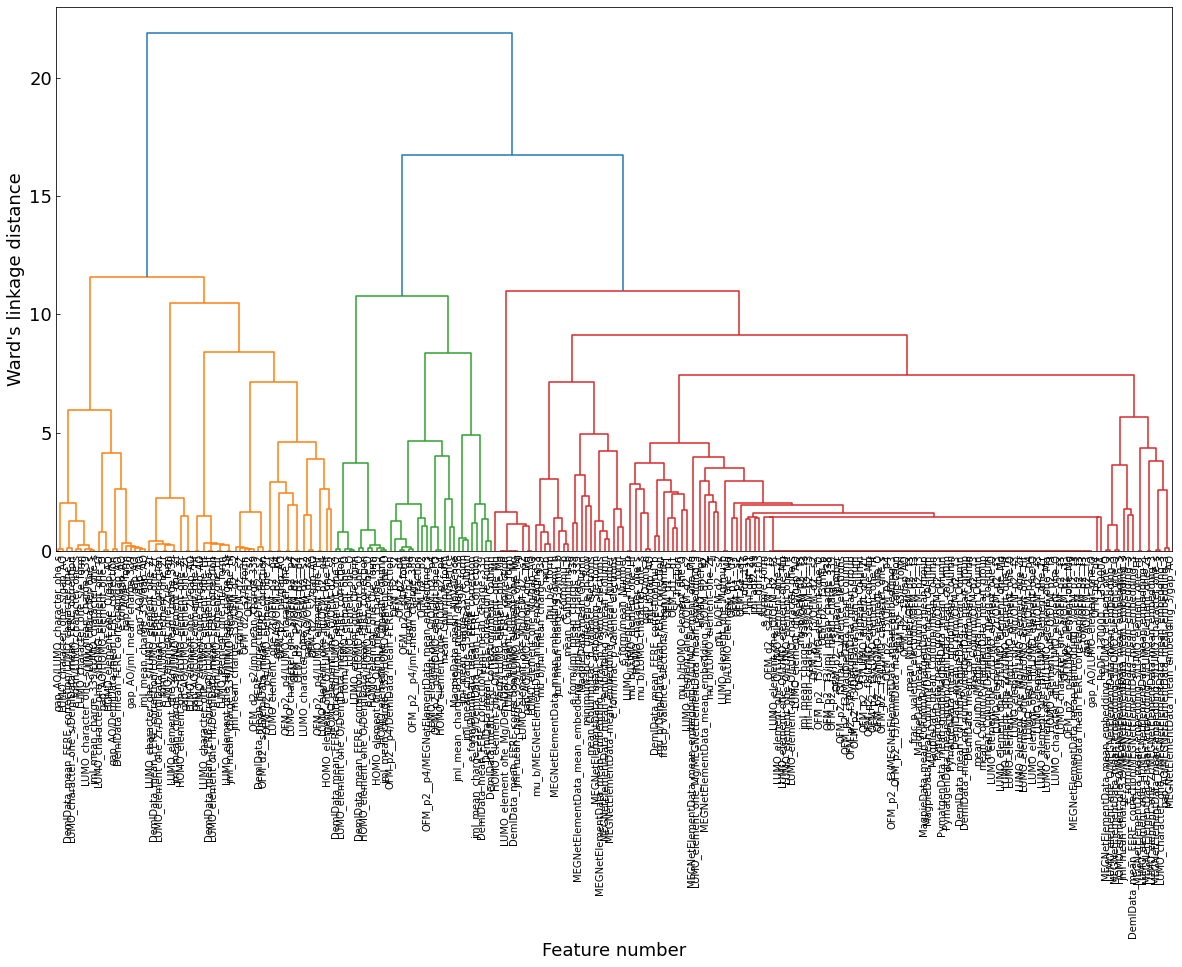

In [5]:
# Perform hierarchical cluster analysis & create the corresponding dendrogram 
data.hierarchical_cluster_analysis()

In [6]:
# Select features based on the given linkage threshold
threshold_list = [1, 1.5, 2, 2.5, 3]

for i in threshold_list:
    final_features = data.apply_linkage_threshold(threshold = i)

Number of features remaining:  94
Features saved as features_selected_from_hierarchical_analysis_gap_is_direct_threshold_1.pkl
Number of features remaining:  68
Features saved as features_selected_from_hierarchical_analysis_gap_is_direct_threshold_1.5.pkl
Number of features remaining:  52
Features saved as features_selected_from_hierarchical_analysis_gap_is_direct_threshold_2.pkl
Number of features remaining:  42
Features saved as features_selected_from_hierarchical_analysis_gap_is_direct_threshold_2.5.pkl
Number of features remaining:  33
Features saved as features_selected_from_hierarchical_analysis_gap_is_direct_threshold_3.pkl


In [38]:
# threshold_list = np.linspace(3, 4, 6)

# for i in threshold_list:
#     final_features = data.apply_linkage_threshold(threshold = i)

#### Test Dummy Model

In [7]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import jaccard_score, multilabel_confusion_matrix, roc_curve, roc_auc_score, \
                            auc, f1_score, classification_report, recall_score, precision_recall_curve, \
                            balanced_accuracy_score, confusion_matrix, accuracy_score, average_precision_score, \
                            hamming_loss, matthews_corrcoef

from lightgbm.sklearn import LGBMClassifier


In [8]:
# Target
target = 'gap_is_direct'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/1. castelli_perovskites (done)/'
path_to_save = path + 'direct_indirect_results/'
path_to_file = path_to_save + 'df_train_' + target + '_engineered.pkl'

# Data
df_train = joblib.load(path_to_save + 'df_train_' + target + '_engineered.pkl')
df_test = joblib.load(path_to_save + 'df_test_' + target + '_engineered.pkl')

problem = 'classification'

# Features 
features = joblib.load(path_to_save + 'features_selected_from_hierarchical_analysis_' + target + '_threshold_2.pkl')
len(features)

52

In [9]:
lgbm  = LGBMClassifier(
                        importance_type='gain',
                        objective='binary',
                        random_state=42,
                        learning_rate=0.1,
                        n_estimators=400,
                        num_leaves=40,
                        #target_classes=['Direct', 'Indirect']
                        )

lgbm.fit(df_train[features], df_train[target].values.ravel())
lgbm

LGBMClassifier(importance_type='gain', n_estimators=400, num_leaves=40,
               objective='binary', random_state=42)

In [10]:
# Predict
y_pred = lgbm.predict_proba(df_test[features])
y_pred_2 = lgbm.predict(df_test[features])
y_test = df_test[target]

# Generate table of results

# micro, macro, weighted
strategy = 'weighted'

print('1. The F-1 score of the model {}\n'.format(f1_score(y_test.ravel(), y_pred_2, average=strategy)))
print('2. The recall score of the model {}\n'.format(recall_score(y_test.ravel(), y_pred_2, average=strategy)))
print('3. Classification report \n {} \n'.format(classification_report(y_test.ravel(), y_pred_2, 
                                                                    target_names=['Indirect', 'Direct'],
                                                                    digits=3)))
print('4. Classification report \n {} \n'.format(multilabel_confusion_matrix(y_test.ravel(), y_pred_2)))
print('5. Confusion matrix \n {} \n'.format(confusion_matrix(y_test.ravel(), y_pred_2)))
print('6. Accuracy score \n {} \n'.format(accuracy_score(y_test.ravel(), y_pred_2)))
print('7. Balanced accuracy score \n {} \n'.format(balanced_accuracy_score(y_test.ravel(), y_pred_2)))

1. The F-1 score of the model 0.9834152018951822

2. The recall score of the model 0.9844162704701532

3. Classification report 
               precision    recall  f1-score   support

    Indirect      0.842     0.645     0.731       124
      Direct      0.988     0.996     0.992      3662

    accuracy                          0.984      3786
   macro avg      0.915     0.821     0.861      3786
weighted avg      0.983     0.984     0.983      3786
 

4. Classification report 
 [[[3647   15]
  [  44   80]]

 [[  80   44]
  [  15 3647]]] 

5. Confusion matrix 
 [[  80   44]
 [  15 3647]] 

6. Accuracy score 
 0.9844162704701532 

7. Balanced accuracy score 
 0.8205325839925302 



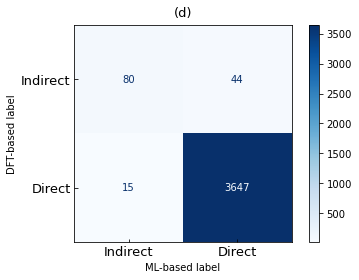

In [11]:
# np.set_printoptions(precision=2)
fontsize = 13
fontsize2 = 10

disp = plot_confusion_matrix(
                            lgbm, 
                            df_test[features], 
                            df_test[target],
                            display_labels=np.array(['Indirect', 'Direct'], dtype='<U10'),
                            cmap=plt.cm.Blues,
                            normalize=None
                            )

disp.ax_.set_title('(d)', fontsize=fontsize, y=1.01) 

plt.tick_params(axis='both', which='major', labelsize=fontsize, direction='in')
plt.xlabel('ML-based label', size=fontsize2)
plt.ylabel('DFT-based label', size=fontsize2)

# #Final_figure
# plt.savefig('confusion_matrix_v3.png', dpi = 500, bbox_inches="tight")

plt.show()

#### Recursive Feature Elimination

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import recursive_feature_elimination as rfe

import joblib
import pandas as pd


In [2]:
# Target
target = 'gap_is_direct'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/1. castelli_perovskites (done)/'
path_to_save = path + 'direct_indirect_results/'
path_to_file = path_to_save + 'df_train_' + target + '_engineered.pkl'

# Features 
features = joblib.load(path_to_save + 'features_selected_from_hierarchical_analysis_gap_is_direct_threshold_2.pkl')

scaled = False

problem = 'classification'

In [3]:
# Initialize module with path_to_file and path_to_save
run = rfe.recursive_feature_elimination(
                                        path_to_file, 
                                        path_to_save, 
                                        target=target,
                                        features = features,
                                        scaled = False,
                                        problem = problem
                                        )

Target: gap_is_direct
No. of features: 52


In [4]:
# Run RFE
estimator = run.base_model(boosting_method = 'lightGBM', objective='binary')
RFE_features = run.perform(cv_fold=5)


Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 fe

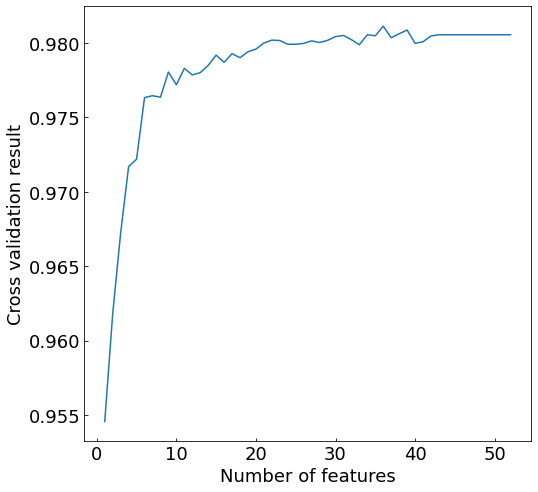

Figure saved as: RFE_plot_gap_is_direct.png


In [5]:
# Plot figure
run.RFE_plot()

#### Bayesian Optimization 

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import optimization as opt

import joblib
import pandas as pd
import numpy as np

In [2]:
# Target
target = 'gap_is_direct'

# Path
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/1. castelli_perovskites (done)/'
path_to_save = path + 'direct_indirect_results/'

# Path to training data
path_to_train_data = path_to_save + 'df_train_' + target + '_engineered.pkl'
path_to_test_data = path_to_save + 'df_test_' + target + '_engineered.pkl'
path_to_features = path_to_save + 'features_selected_from_RFE_' + target + '.pkl' 

problem = 'classification'

scaled = False

In [3]:
# Initialization
final_stage = opt.optimization(
                            path_to_train_data = path_to_train_data,
                            path_to_test_data = path_to_test_data,
                            path_to_save = path_to_save,
                            features = path_to_features,
                            target = target,
                            problem = problem,
                            scaled = scaled
                            )

Name of target column:  gap_is_direct
No. of exploratory features:  36


In [4]:
# Choose ML model
final_stage.base_model(boosting_method = 'lightGBM', objective='binary')

LGBMClassifier(importance_type='gain', objective='binary', random_state=42)

In [5]:
# Define hyperparameters; range should be edited directly from the script
final_stage.set_hyperparameters()

(['learning_rate', 'n_estimators', 'num_leaves'],
 [Real(low=0.01, high=1.0, prior='log-uniform', transform='identity'),
  Integer(low=100, high=800, prior='uniform', transform='identity'),
  Integer(low=10, high=100, prior='uniform', transform='identity')])

In [6]:
# optimization_method: dummy_minimize, gp_minimize, gbrt_minimize, forest_minimize
final_stage.run(optimization_method = 'bayesian')

Iteration No: 1 started. Evaluating function at random point.

 {'learning_rate': 0.11982082857387949, 'n_estimators': 359, 'num_leaves': 66} 

Score:  -0.9800690008274019 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 3.5492
Function value obtained: -0.9801
Current minimum: -0.9801
Iteration No: 2 started. Evaluating function at random point.

 {'learning_rate': 0.060943918023287254, 'n_estimators': 538, 'num_leaves': 34} 

Score:  -0.9811195687755102 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 2.8086
Function value obtained: -0.9811
Current minimum: -0.9811
Iteration No: 3 started. Evaluating function at random point.

 {'learning_rate': 0.4498438886442696, 'n_estimators': 273, 'num_leaves': 25} 

Score:  -0.9668300787989427 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 1.6105
Function value obtained: -0.9668
Current minimum: -0.9811
Iteration No: 4 started. Evaluating function at random point.

 {'learning_rate

Saved: Optimisation_result_gap_is_direct.png


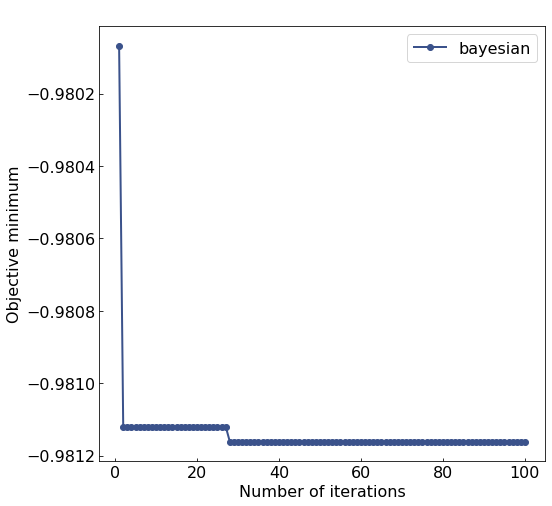

In [7]:
# Plot convergence plot
final_stage.convergence_plot()

<Figure size 720x720 with 0 Axes>

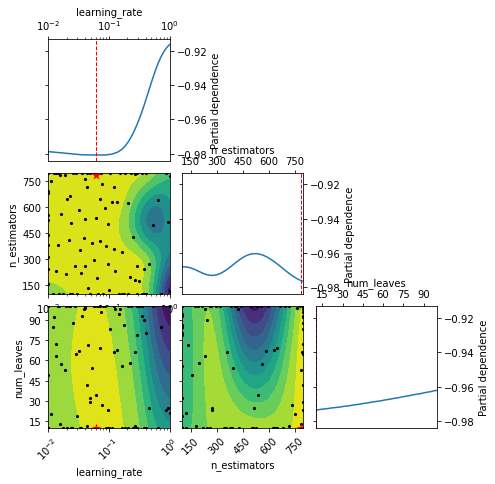

<Figure size 720x720 with 0 Axes>

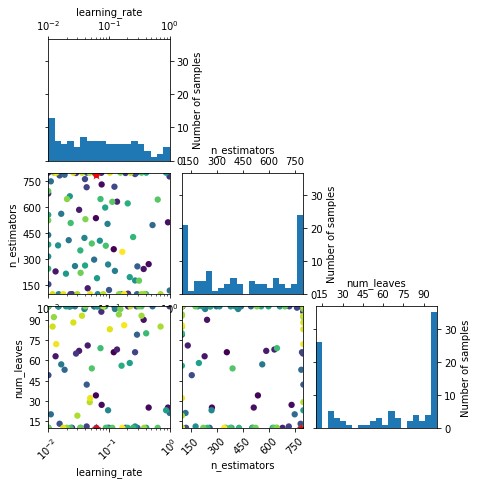

In [8]:
# objective and evaluation plot
final_stage.objective_plot()

In [9]:
# Train model with optimal hyperparameter identified
final_stage.train_model()

LGBMClassifier(importance_type='gain', learning_rate=0.061982249170821235,
               n_estimators=787, num_leaves=10, objective='binary',
               random_state=42)

1. The F-1 score of the model 0.9816413429747177

2. The recall score of the model 0.9828314844162704

3. Classification report 
               precision    recall  f1-score   support

    Indirect       0.82      0.61      0.70       124
      Direct       0.99      1.00      0.99      3662

    accuracy                           0.98      3786
   macro avg       0.90      0.80      0.85      3786
weighted avg       0.98      0.98      0.98      3786
 

4. Classification report 
 [[[3645   17]
  [  48   76]]

 [[  76   48]
  [  17 3645]]] 

5. Confusion matrix 
 [[  76   48]
 [  17 3645]] 

6. Accuracy score 
 0.9828314844162704 

7. Balanced accuracy score 
 0.8041304769119642 



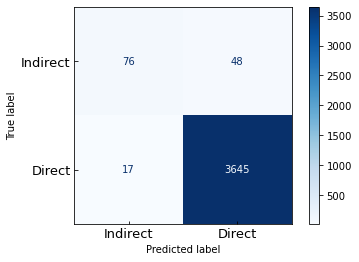

Saved: Confusion_matrix_gap_is_direct.png


In [10]:
# Evaluate model using test set
final_stage.evaluate(
                    strategy='weighted', 
                    target_names=['Indirect', 'Direct']
                    )


roc_auc_score: 0.9899490847589014


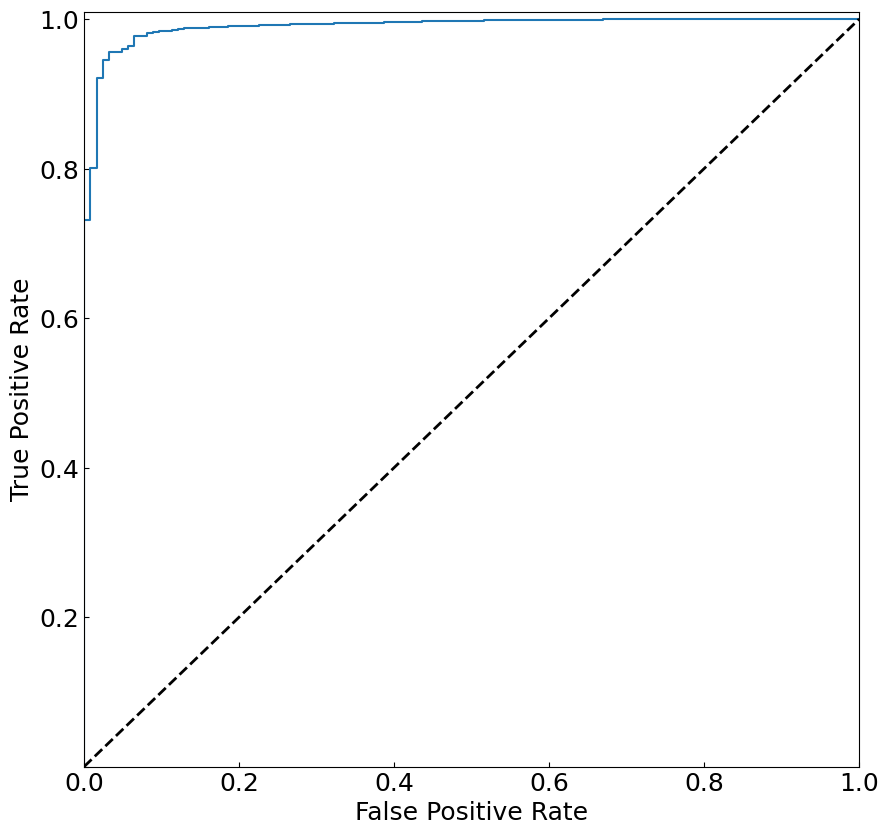

Saved: Receiver_operating_characteristic_curve_gap_is_direct.png


In [11]:
# Evaluate model using test set
final_stage.ROC(
                overall_performance=True,
                positive_class=1
                )

Possible DET equal error rate (see the plot and find the correct value): [1.0]


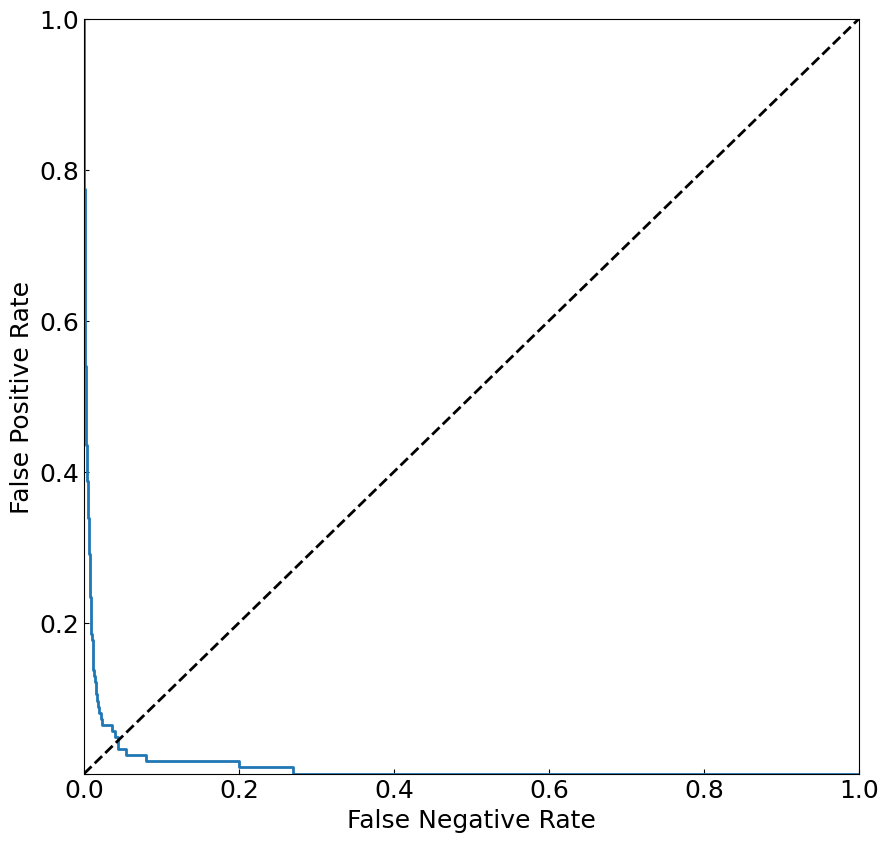

Saved: detection_error_tradeoff_curves_gap_is_direct.png


In [12]:
# Evaluate model using test set
final_stage.DET()

average_precision: 0.9996407697284636


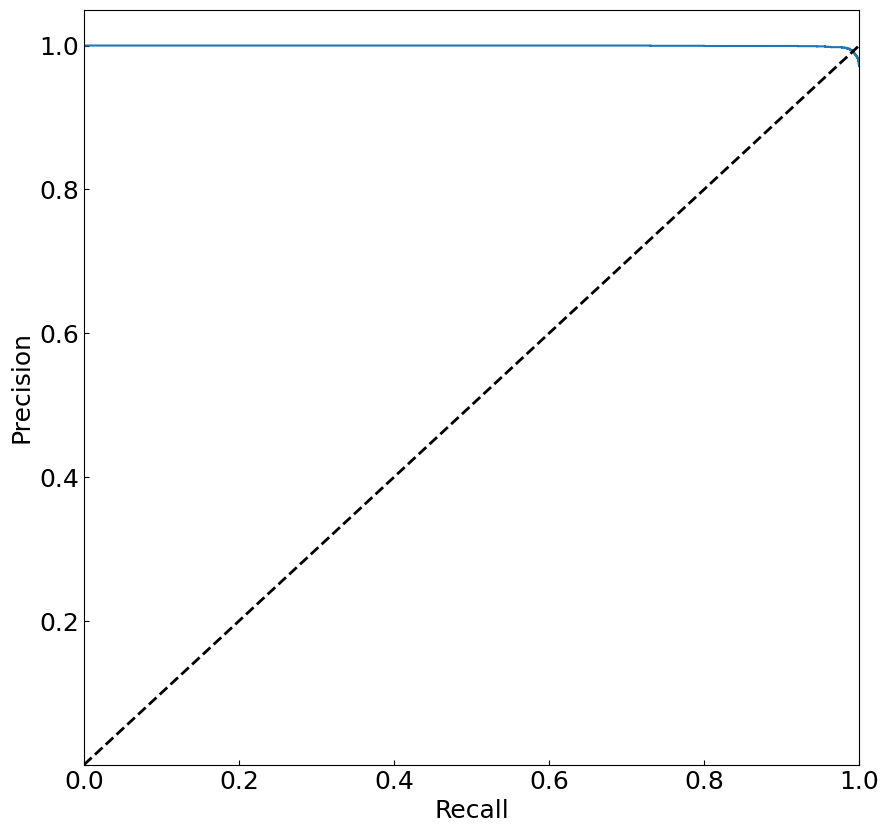

Saved: precision_recall_gap_is_direct.png


In [13]:
# Evaluate model using test set
final_stage.PR(positive_class=1)

### Final Figure

In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import jaccard_score, multilabel_confusion_matrix, roc_curve, roc_auc_score, \
                            auc, f1_score, classification_report, recall_score, precision_recall_curve, \
                            balanced_accuracy_score, confusion_matrix, accuracy_score, average_precision_score, \
                            hamming_loss, matthews_corrcoef

from lightgbm.sklearn import LGBMClassifier


In [2]:
# Target
target = 'gap_is_direct'

# Path
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/1. castelli_perovskites (done)/'
path_to_save = path + 'direct_indirect_results/'

# Path to training data
path_to_train_data = path_to_save + 'df_train_' + target + '_engineered.pkl'
path_to_test_data = path_to_save + 'df_test_' + target + '_engineered.pkl'
path_to_features = path_to_save + 'features_selected_from_RFE_' + target + '.pkl' 

problem = 'classification'

scaled = False

In [3]:
df_train = joblib.load(path_to_train_data)
df_test = joblib.load(path_to_test_data)

features = joblib.load(path_to_features)

In [4]:
lgbm  = LGBMClassifier(
                        importance_type='gain',
                        objective='binary',
                        learning_rate=0.061982249170821235,
                        n_estimators=787,
                        num_leaves=10,
                        random_state=42
                        )

lgbm.fit(df_train[features], df_train[target].values.ravel())
lgbm

LGBMClassifier(importance_type='gain', learning_rate=0.061982249170821235,
               n_estimators=787, num_leaves=10, objective='binary',
               random_state=42)

In [5]:
# Predict
y_pred = lgbm.predict_proba(df_test[features])
y_pred_2 = lgbm.predict(df_test[features])
y_test = df_test[target]

# Generate table of results

# micro, macro, weighted
strategy = 'weighted'

print('1. The F-1 score of the model {}\n'.format(f1_score(y_test.ravel(), y_pred_2, average=strategy)))
print('2. The recall score of the model {}\n'.format(recall_score(y_test.ravel(), y_pred_2, average=strategy)))
print('3. Classification report \n {} \n'.format(classification_report(y_test.ravel(), y_pred_2, 
                                                                    target_names=['Indirect', 'Direct'],
                                                                    digits=3)))
print('4. Classification report \n {} \n'.format(multilabel_confusion_matrix(y_test.ravel(), y_pred_2)))
print('5. Confusion matrix \n {} \n'.format(confusion_matrix(y_test.ravel(), y_pred_2)))
print('6. Accuracy score \n {} \n'.format(accuracy_score(y_test.ravel(), y_pred_2)))
print('7. Balanced accuracy score \n {} \n'.format(balanced_accuracy_score(y_test.ravel(), y_pred_2)))


1. The F-1 score of the model 0.9822981484997226

2. The recall score of the model 0.9830956154252509

3. Classification report 
               precision    recall  f1-score   support

    Indirect      0.794     0.653     0.717       124
      Direct      0.988     0.994     0.991      3662

    accuracy                          0.983      3786
   macro avg      0.891     0.824     0.854      3786
weighted avg      0.982     0.983     0.982      3786
 

4. Classification report 
 [[[3641   21]
  [  43   81]]

 [[  81   43]
  [  21 3641]]] 

5. Confusion matrix 
 [[  81   43]
 [  21 3641]] 

6. Accuracy score 
 0.9830956154252509 

7. Balanced accuracy score 
 0.8237456175895421 



In [6]:
from sklearn.metrics import roc_auc_score, matthews_corrcoef, average_precision_score

print(roc_auc_score(np.array(y_test.tolist()), y_pred[:, 1], average='macro'))
print(matthews_corrcoef(np.array(y_test.tolist()), y_pred_2))

n_classes = 2
y_test_2 = label_binarize(y_test, classes = list(range(n_classes)))
print(average_precision_score(y_test_2, y_pred[:, 1], average="macro"))

0.9902970349359596
0.7117770975578784
0.9996555326131855


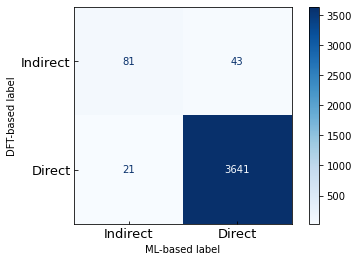

In [7]:
# np.set_printoptions(precision=2)
fontsize = 13
fontsize2 = 10

disp = plot_confusion_matrix(
                            lgbm, 
                            df_test[features], 
                            df_test[target],
                            display_labels=np.array(['Indirect', 'Direct'], dtype='<U10'),
                            cmap=plt.cm.Blues,
                            normalize=None
                            )

plt.tick_params(axis='both', which='major', labelsize=fontsize, direction='in')
plt.xlabel('ML-based label', size=fontsize2)
plt.ylabel('DFT-based label', size=fontsize2)

# #Final_figure
plt.savefig(path_to_save + 'confusion_matrix_v3.png', dpi = 500, bbox_inches="tight")

plt.show()

In [8]:
df_test.groupby([target]).count()

,minimum_oxidation_state,maximum_oxidation_state,range_oxidation_state,std_dev_oxidation_state,compound_possible,max_ionic_char,avg_ionic_char,avg_anion_electron_affinity,minimum_EN_difference,maximum_EN_difference,...,OFM_d2__s2/DemlData_mean_col_num,OFM_d2__s2/PymatgenData_mean_group,OFM_d2__s2/MagpieData_mean_Column,OFM_d2__s2/frac_p_valence_electrons,OFM_d2__s2/mean_Number,OFM_d2__s2/OFM_p2__f3,OFM_d2__s2/jml_mean_charge_339,OFM_d2__s2/jml_mean_charge_338,OFM_d2__s2/mu_b,OFM_d2__s2/LUMO_element_ohe_O
gap_is_direct,,,,,,,,,,,,,,,,,,,,,
False,124,124,124,124,124,124,124,124,124,124,...,124,124,124,124,124,124,124,124,124,124
True,3662,3662,3662,3662,3662,3662,3662,3662,3662,3662,...,3662,3662,3662,3662,3662,3662,3662,3662,3662,3662


[Text(0.5, 0, 'Relevance score'), Text(0, 0.5, 'Feature')]

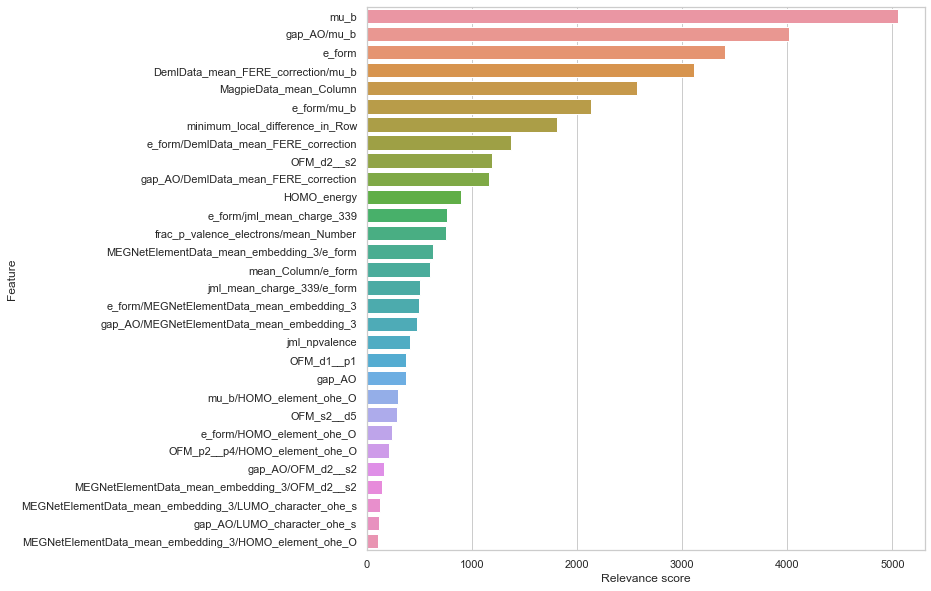

In [9]:
import seaborn as sns
# Generate feature ranking
model = lgbm

feature_score = pd.DataFrame({'feature': features, 'relevance_score': model.feature_importances_})
feature_score = feature_score.sort_values(by = 'relevance_score', ascending = False)
feature_score = feature_score.reset_index(drop = True)

#Plot data of feature relevance 
sns.set(rc = {'figure.figsize':(10, 10)})
sns.set_style("whitegrid")

# Number of features to plot
no_of_features = 30

fig = sns.barplot(x = 'relevance_score', y = 'feature', data = feature_score[:no_of_features])
fig.set(xlabel = 'Relevance score', ylabel = 'Feature')

# plt.savefig('feature_relevance_plot_experimental_bayesian_scaffold_split_v2.png', dpi = 300)